#  Всё.из.кафе — инсайты для роста лояльности и партнерства


---
Автор: Юрий Кузнецов

Дата: 22.07.2025


### 🔍 **Введение**  
В условиях жесткой конкуренции на рынке доставки еды сервис «Всё.из.кафе» сталкивается с вызовами удержания пользователей и оптимизации работы с ресторанами-партнерами.  
**Цель проекта** — выявить скрытые инсайты в данных, чтобы:  
- 🧭 **Понять поведение пользователей**, снизить отток и повысить конверсию;  
- 🚀 **Оптимизировать пользовательский путь**, устранив «точки провала»;  
- 🤝 **Укрепить партнерские отношения** через персонализированные стратегии для ресторанов.  

Используемые методы:  
- 📊 **Воронка событий** для анализа конверсии новых пользователей;  
- 🎯 **RFM-сегментация** для оценки лояльности клиентов;  
- 🧩 **K-Means кластеризация** для группировки ресторанов по бизнес-моделям.  

**Ключевые вопросы**:  
> _Где теряются пользователи? Какие сегменты клиентов критичны для удержания? Как повысить эффективность партнерских программ?_  

---

### 🔄 **План реализации**  
1. **Предобработка данных**  
   - Очистка от дубликатов и аномалий, преобразование типов данных.
   
2. **Анализ пользовательского пути**  
   - Построение воронки событий: от первого посещения → регистрация → заказ.  
   - Расчет конверсии на каждом этапе, выявление «провалов». 
   
3. **RFM-сегментация**  
   - Группировка пользователей по:  
     - **Recency** (давность последнего заказа),  
     - **Frequency** (частота заказов),  
     - **Monetary** (суммарная выручка).  
   - Выделение сегментов: «Чемпионы», «Потерянные», «Потенциальные».
   
4. **Кластеризация ресторанов**  
   - Анализ по параметрам: средний чек, размер меню, частота заказов.  
   - Интерпретация кластеров (напр.: «Высокодоходные, но редкие», «Массовый сегмент»). 
   
5. **Итоговые рекомендации**  
   - Приоритезация действий для UX, маркетинга и отдела партнерств.  

---

### 💡 **Ожидаемые результаты**  
- Точечные предложения по улучшению интерфейса (напр., упрощение регистрации);  
- Стратегии удержания для RFM-сегментов (перс. скидки, push-уведомления);  
- Кастомизированные условия для ресторанов (тарифы, бонусы за активность).  

**Философия проекта**:  
> *«Превратить данные в рост — через понимание каждого клиента и партнера»* 🌟

### 💾 Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.


## Загрузка данных и их предобработка

Загрузим данные и получим первую информацию о них. Проведем необходимую предобработку.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap 
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# Загрузим данные и сохраним в датасет
df = pd.read_csv('https://code.s3.yandex.net/datasets/insides_data.csv', parse_dates = (['first_date', 'datetime']))

In [3]:
# Выводим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   visitor_uuid  205510 non-null  object        
 1   user_id       205510 non-null  float64       
 2   device_type   205510 non-null  object        
 3   city_id       205510 non-null  int64         
 4   source        205510 non-null  object        
 5   first_date    205510 non-null  datetime64[ns]
 6   visit_id      205510 non-null  int64         
 7   event         205510 non-null  object        
 8   datetime      205510 non-null  datetime64[ns]
 9   rest_id       166915 non-null  object        
 10  object_id     21308 non-null   float64       
 11  order_id      7008 non-null    float64       
 12  revenue       7008 non-null    float64       
 13  delivery      7008 non-null    float64       
 14  commission    21308 non-null   float64       
dtypes: datetime64[ns]

Датасет df состоит из 205510 строк в 15 столбцах. Типы данных соответствуют содержимому. Однако возможно оптимизировать числовые типы для экономии ресурсов.

In [4]:
# Функция оптимизации разрядности
def optimize_dtypes(df):
    # Оптимизация целочисленных колонок
    int_cols = ['city_id', 'visit_id']
    for col in int_cols:
        df[col] = pd.to_numeric(df[col], errors='ignore', downcast='integer')
        df['user_id'] = df['user_id'].astype('int32')
    # Оптимизация вещественных колонок
    float_cols = ['revenue', 'delivery', 'commission', 'object_id', 'order_id']
    for col in float_cols:
        df[col] = pd.to_numeric(df[col], downcast='float')
    return df
# Применяем функцию
df = optimize_dtypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   visitor_uuid  205510 non-null  object        
 1   user_id       205510 non-null  int32         
 2   device_type   205510 non-null  object        
 3   city_id       205510 non-null  int8          
 4   source        205510 non-null  object        
 5   first_date    205510 non-null  datetime64[ns]
 6   visit_id      205510 non-null  int32         
 7   event         205510 non-null  object        
 8   datetime      205510 non-null  datetime64[ns]
 9   rest_id       166915 non-null  object        
 10  object_id     21308 non-null   float32       
 11  order_id      7008 non-null    float32       
 12  revenue       7008 non-null    float64       
 13  delivery      7008 non-null    float32       
 14  commission    21308 non-null   float32       
dtypes: datetime64[ns]

C:\Users\urize\AppData\Local\Temp\ipykernel_18628\2690927209.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore', downcast='integer')
C:\Users\urize\AppData\Local\Temp\ipykernel_18628\2690927209.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore', downcast='integer')


Типы данных оптимизированы, экономия памяти - 29%

In [5]:
# Считаем пропуски
missing_df = (pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 
                                        'Процент пропусков': round(df.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='Greys'))
missing_df

,Кол-во пропусков,Процент пропусков
order_id,198502,96.600000
revenue,198502,96.600000
delivery,198502,96.600000
object_id,184202,89.600000
commission,184202,89.600000
rest_id,38595,18.800000
visitor_uuid,0,0.000000
user_id,0,0.000000
device_type,0,0.000000
city_id,0,0.000000


Пропуски в данных обусловлены объединением нескольких источников:

- rest_id (166915/205510) — отсутствует для событий без привязки к ресторану (просмотры главной страницы, корзины)

- object_id, commission (21308/205510) — заполнены только для событий с блюдами (просмотр карточек, заказы)

- order_id, revenue, delivery (7008/205510) — есть только для завершенных заказов

Сохраняем пропуски как маркеры типа события.

In [6]:
# Посмотрим в каком периоде представлены данные
print("Диапазон дат datetime:",
      df['datetime'].min(), "-", df['datetime'].max())
print("Диапазон дат first_date:",
      df['first_date'].min(), "-", df['first_date'].max())

Диапазон дат datetime: 2021-05-01 00:10:55 - 2021-07-02 00:12:08
Диапазон дат first_date: 2021-04-30 00:00:00 - 2021-07-01 00:00:00


Данные представлены в периоде 2 месяцев: май-июнь 2021 года.

In [7]:
# Проверяем наличие явных дубликатов
print(df.duplicated().sum())

0


Дублирующихся строк по всему датасету не обнаружено

In [8]:
# Проверяем наличие неявных дубликатов. Повторные события в рамках сессии: Одинаковые event + datetime + visit_id
print(df[['event', 'datetime', 'visit_id']].duplicated().sum())

0


In [9]:
# Проверяем наличие неявных дубликатов. Одинаковые event + datetime + user_id
print(df[['event', 'datetime', 'user_id']].duplicated().sum())

7


In [10]:
# Удаляем дублирующиея события для пользователя и времени
df = df.drop_duplicates(subset=['event', 'datetime', 'user_id'])

In [11]:
# Число уникальных посетителей, пользователей, ресторанов, типов устройств
print(f"Число уникальных посетителей: {df['visitor_uuid'].nunique()}")
print(f"Число уникальных пользователей: {df['user_id'].nunique()}")
print(f"Число уникальных ресторанов: {df['rest_id'].nunique()}")
print(f"Типы устройств: {df['device_type'].unique()}")

Число уникальных посетителей: 8891
Число уникальных пользователей: 8473
Число уникальных ресторанов: 21
Типы устройств: ['Desktop' 'Mobile']


In [12]:
# Выведем статистику и посмотрим диапазоны числовых значений на предмет аномалий
df.describe()

,user_id,city_id,first_date,visit_id,datetime,object_id,order_id,revenue,delivery,commission
count,205503.000000,205503.000000,205503,2.055030e+05,205503,21308.000000,7008.000000,7008.000000,7008.000000,21308.000000
mean,515733.204712,5.845540,2021-05-28 12:58:42.167559424,1.815764e+08,2021-06-01 05:25:28.537738752,26955.929688,631674.375000,2522.338903,24.539211,0.055926
min,2094.000000,1.000000,2021-04-30 00:00:00,1.713327e+08,2021-05-01 00:10:55,1319.000000,589531.000000,235.200000,9.900000,0.040000
25%,510768.000000,6.000000,2021-05-14 00:00:00,1.767578e+08,2021-05-19 17:05:30.500000,24052.000000,613212.500000,1316.000000,17.000000,0.050000
50%,587043.000000,6.000000,2021-05-29 00:00:00,1.810334e+08,2021-06-02 15:14:06,27084.000000,630333.000000,1944.600000,24.200001,0.050000
75%,611706.000000,6.000000,2021-06-10 00:00:00,1.863619e+08,2021-06-13 20:40:10.500000,30567.000000,650981.000000,3150.000000,32.099998,0.060000
max,679837.000000,6.000000,2021-07-01 00:00:00,1.940143e+08,2021-07-02 00:12:08,36766.000000,675680.000000,42000.000000,39.900002,0.110000
std,158024.722156,0.631332,NaN,6.195997e+06,NaN,5140.555176,23572.283203,2187.799948,8.652131,0.012108


Резко аномальных значений не наблюдается. Диапазоны соответствуют контексту содержимого.

### 📊 **Промежуточный вывод**

 **Загрузка и предобработка данных завершена**. 
 
Получен датасет 📁 `df` с информацией о 
- 👥 Поведении пользователей
- 💰 Финансовыми данными 
- 🏪 Данными о партнерах

🔍 Анализ и предобработка:
- ✔️ Названия корректны  
- ✔️ Типы данных преобразованы и оптимизированы
- ✔️ Наличие пропусков системно и отражает бизнес-логику сервиса  
- ✔️ Явных и неявных дубликатов нет 
- ✔️ Аномальных значений не зафиксировано
- ✔️ Период май-июнь 2021
- ✔️ Число уникальных посетителей: 8891
- ✔️ Число уникальных пользователей: 8473
- ✔️ Число уникальных ресторанов: 21
- ✔️ Типы устройств: Mobile, Desktop

✅ Данные позволяют анализировать воронку конверсии, сегментировать пользователей и рестораны, оценивать финансовые показатели.

---

## Анализ пользовательского пути

На фоне стабильных показателей установок приложения наблюдается снижение конверсии в заказы при неизменном рекламном бюджете. Парадоксально, что доля заказов с десктопной версии растёт, тогда как мобильная версия демонстрирует негативную динамику.

Гипотеза:
В мобильном интерфейсе возникли неочевидные точки оттока пользователей, не связанные с функционалом каталога или оплаты (по заверениям разработки, последние изменения касались только верификации данных).

С помощью воронок изучим общий пользовательский путь новых пользователей, затем сравним поведение пользователей мобильной и десктопной версий приложения. 

**Задача 2.1.** Построим и визуализируем две воронки (по всем данным): 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

In [13]:
# Фиксируем этапы воронки
funnel_steps = ['authorization', 'main_page', 'reg_page', 'confirm_phone',
               'object_page', 'add_to_cart', 'order']

# Фильтруем только нужные шаги и считаем пользователей
funnel_df = df[df['event'].isin(funnel_steps)]
funnel_df = funnel_df.groupby('event')['user_id'].nunique().reindex(funnel_steps).reset_index()
funnel_df = funnel_df.rename(columns={'user_id': 'users_n'})


# Считаем конверсию для классической воронки
funnel_df['conversion_from_first_%'] = funnel_df['users_n'] / funnel_df['users_n'].iloc[0] * 100

# Считаем конверсию для воронки step by step
funnel_df['conversion_from_previous_step_%'] = funnel_df['users_n'] / funnel_df['users_n'].shift(1) * 100

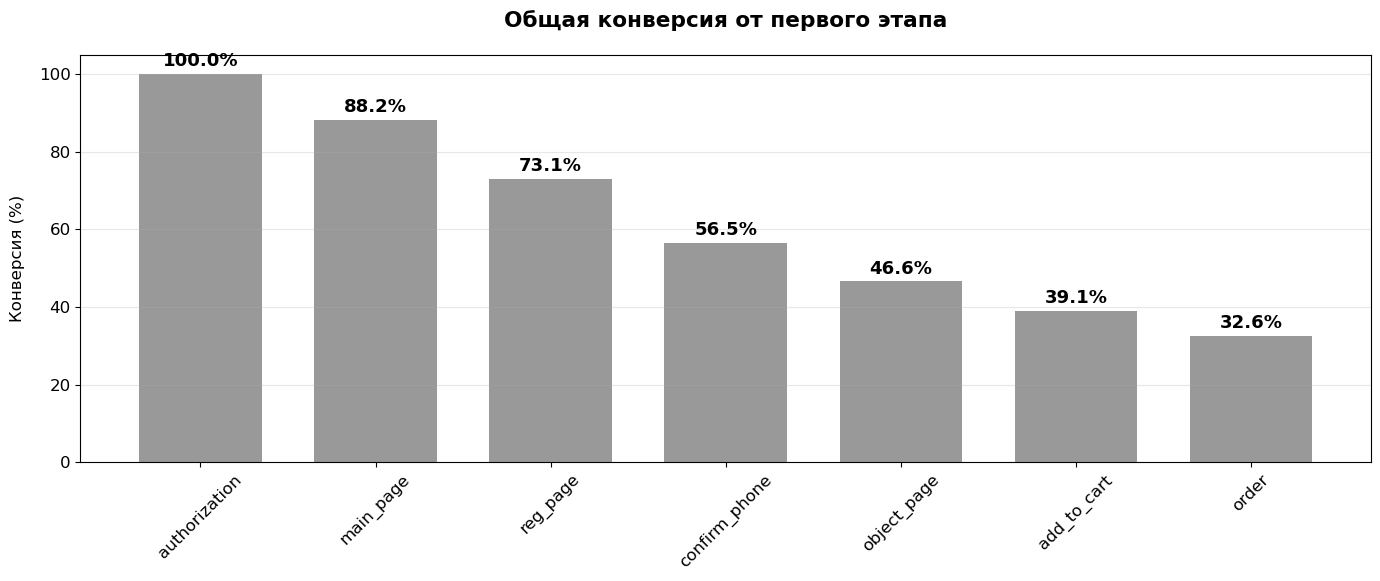

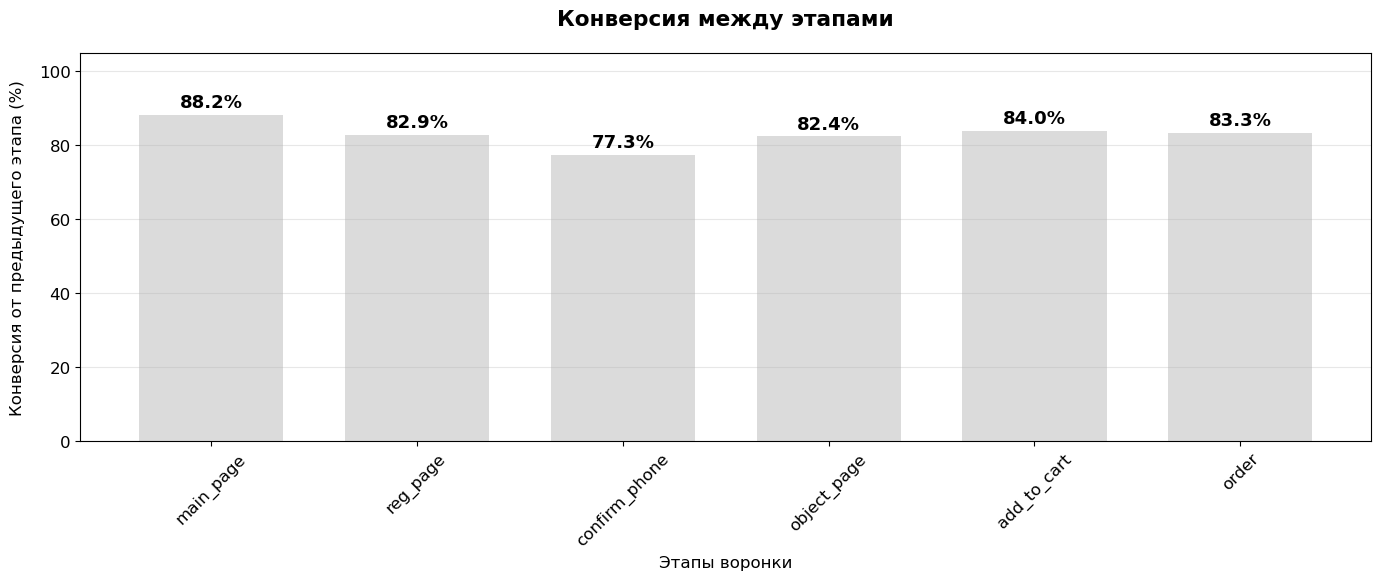

In [14]:
# Настройки стиля
plt.style.use('default')
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold', 
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# 1. График общей конверсии
plt.figure(figsize=(14, 6))
bars = plt.bar(funnel_df['event'], funnel_df['conversion_from_first_%'],
              color='grey', alpha=0.8, width=0.7)

# подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=13,
            fontweight='bold') 

plt.title('Общая конверсия от первого этапа', pad=20)
#plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия (%)', labelpad=10)
plt.xticks(rotation=45)
plt.ylim(0, 105)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. График пошаговой конверсии
plt.figure(figsize=(14, 6))
bars = plt.bar(funnel_df['event'], funnel_df['conversion_from_previous_step_%'],
              color='lightgrey', alpha=0.8, width=0.7)

# подписи (пропускаем первый этап)
for i, bar in enumerate(bars):
    if i == 0: continue
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=13,
            fontweight='bold')

plt.title('Конверсия между этапами', pad=20)
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия от предыдущего этапа (%)', labelpad=10)
plt.xticks(rotation=45)
plt.ylim(0, 105)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Классическая воронка показывает плавное снижение конверсии до 32.6% пользователей на финальном этапе заказа order. Потеря 67% пользователей от входа до заказа.

На диаграмме step by step видна просадка при переходе от reg_page (82.9%) к conform_phone(77.3%). Конверсия перехода между другими этапами относительно стабильна в диапазоне 82-88%. Критический этап - переход на подтверждение телефона.

**Задача 2.2.** Сравним пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого построим **воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.
    
Сравним результаты между собой и проанализируем, есть ли различия в пользовательском пути для различных приложений

In [15]:
# Считаем уникальных пользователей на каждом этапе для каждого типа устройств
funnel_compare = (
    df[(df['event'].isin(funnel_steps))&(df['device_type'].isin(['Mobile', 'Desktop']))]
    .groupby(['event', 'device_type'])['user_id']
    .nunique()
    .unstack()
    .reindex(funnel_steps)
    .rename(columns={'Mobile': 'mobile_users', 'Desktop': 'desktop_users'})
)
# Добавляем конверсию между шагами для каждого устройства
funnel_compare['mobile_conversion_sbs(%)'] = (funnel_compare['mobile_users'] / funnel_compare['mobile_users'].shift(1) * 100)
funnel_compare['desktop_conversion_sbs(%)'] = (funnel_compare['desktop_users'] / funnel_compare['desktop_users'].shift(1) * 100)
# Заполняем NaN для первого шага
funnel_compare.iloc[0, 2:] = 100
funnel_compare


device_type,desktop_users,mobile_users,mobile_conversion_sbs(%),desktop_conversion_sbs(%)
event,,,,
authorization,4750,2810,100.000000,100.000000
main_page,4325,2341,83.309609,91.052632
reg_page,3432,2069,88.381034,79.352601
confirm_phone,3097,1139,55.050749,90.238928
object_page,2657,826,72.519754,85.792703
add_to_cart,2203,716,86.682809,82.913060
order,1814,614,85.754190,82.342261


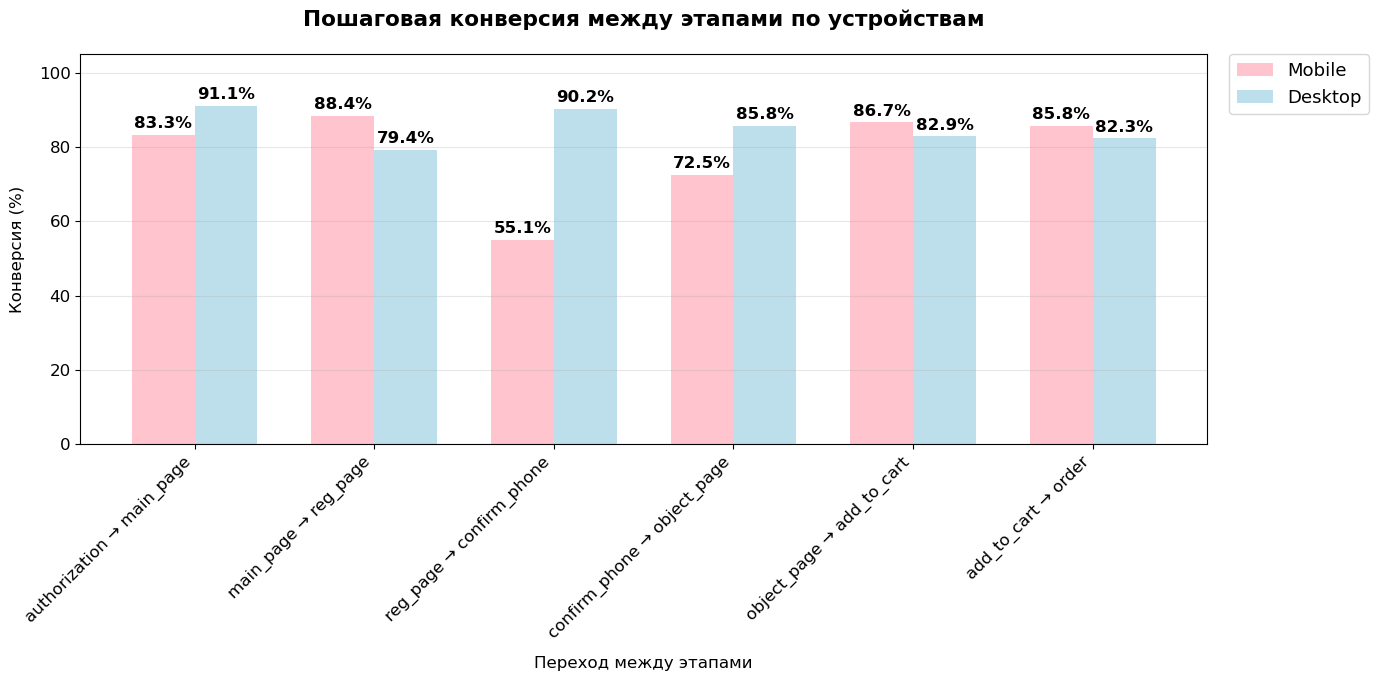

In [16]:
# Настройки стиля
plt.style.use('default')
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

plt.figure(figsize=(14, 7))
plt.subplots_adjust(right=0.8) 

width = 0.35
x = np.arange(len(funnel_steps[1:]))  # Без первого этапа

# Столбцы для Mobile
bars_mobile = plt.bar(x - width/2, funnel_compare['mobile_conversion_sbs(%)'].iloc[1:], 
                     width, color='#FFB6C1', alpha=0.8, label='Mobile')
# Столбцы для Desktop
bars_desktop = plt.bar(x + width/2, funnel_compare['desktop_conversion_sbs(%)'].iloc[1:], 
                      width, color='#ADD8E6', alpha=0.8, label='Desktop')
# Подписи значений
for bars in [bars_mobile, bars_desktop]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%',
                ha='center', va='bottom',
                fontsize=12, fontweight='bold')
# Настройки оформления
plt.title('Пошаговая конверсия между этапами по устройствам', pad=20)
plt.xlabel('Переход между этапами', labelpad=10)
plt.ylabel('Конверсия (%)', labelpad=10)
# Подписи переходов
transition_labels = [f'{funnel_steps[i]} → {funnel_steps[i+1]}' 
                    for i in range(len(funnel_steps)-1)]
plt.xticks(x, transition_labels, rotation=45, ha='right')

plt.ylim(0, 105)
plt.grid(axis='y', alpha=0.3)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

На Mobile катастрофически проваливается конверсия на переходе к подтверждению телефона (55.1% vs 90.2% на Desktop) — теряем 45% пользователей на этом этапе.


### **📊 Промежуточный вывод по анализу воронок**  

#### **1. 📌 Общая картина**  
- **📉 Общая конверсия**: **32.6%** (из 7,410 пользователей → 2,416 заказов)  
- **🔴 Ключевые потери**:  
  - **📱 Подтверждение телефона** (`reg_page → confirm_phone`) – **-23.6%**  
---

#### **2. 📱 vs 💻 Различия по устройствам**  
| **Этап**                    | **📱 Mobile** | **💻 Desktop** | **📊 Разрыв** |  
|-----------------------------|----------------|----------------|----------------|  
|`reg_page → confirm_phone`   | 55.1% ⚠️      | 90.2% ✅       | **-35.1%** 🚨 |  
|`confirm_phone → object_page`| 72.5%          | 85.8%          | **-13.3%**     |  

---

#### **3. 🚨 Основные проблемы**  
- **📱 Mobile**:  
  - **🔐 Верификация телефона** — конверсия **55.1%** (катастрофически низкая)  
  - **🛍️ Переход на страницу блюда** — хуже на **13%** vs Desktop  
- **💻 Desktop**:  
  - **📝 Переход к регистрации** (`main_page → reg_page`) — **79.4%** (можно улучшить)  

---

#### **4. 🛠️ Рекомендации**  

**📱 Для Mobile (срочно!):** 
- **🔐 Упростить регистрацию** (через соцсети / гостевой заказ / биометрия)  
- **🔗 Автоподтверждение по ссылке** (вместо кода в SMS)  
- **🔼 Сохранение контекста** после верификации (`confirm_phone → object_page`)  

**💻 Для Desktop:**  
- **⚡ Оптимизировать переход к регистрации**  

**🔄 Для всех:**  
- **🧪 A/B-тесты** на проблемных этапах  
---

### **🎯 Итог**  
**📱 Mobile** требует **срочного редизайна** (особенно верификации), 

**💻 Desktop** — точечной оптимизации. 

**Приоритет:** исправить падение конверсии при переходе на подтверждение телефона для мобильных пользователей.  


---

## RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям: 
- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установим **03 июля 2021 года**.

**Задача 3.1.** Для каждого покупателя посчитаем:
- количество дней с последней покупки — давность (R);
- частоту покупок (F);
- стоимость всех покупок — сумму трат (M).
    
После этого построим три гистограммы и проанализируем их.

In [17]:
# Проверим есть ли заказы с пропущенной или нулевой выручкой
print(f"Заказов с пропущенной выручкой: {df[df['event'] == 'order']['revenue'].isna().sum()}")
print(f"Заказов с нулевой выручкой: {df[df['event'] == 'order']['revenue'].isnull().sum()}")


Заказов с пропущенной выручкой: 0
Заказов с нулевой выручкой: 0


In [18]:
# Рассчитываем давность заказа (в днях)
current_date = pd.to_datetime('2021-07-03')
df['order_recency'] = (current_date - df['datetime']).dt.days

# Группируем по пользователям и вычисляем RFM-метрики
df_rfm = df[df['event'] == 'order'].groupby('user_id').agg(
    recency=('order_recency', 'min'),  
    frequency=('order_id', 'nunique'), 
    monetary_value=('revenue', 'sum')  
).reset_index()

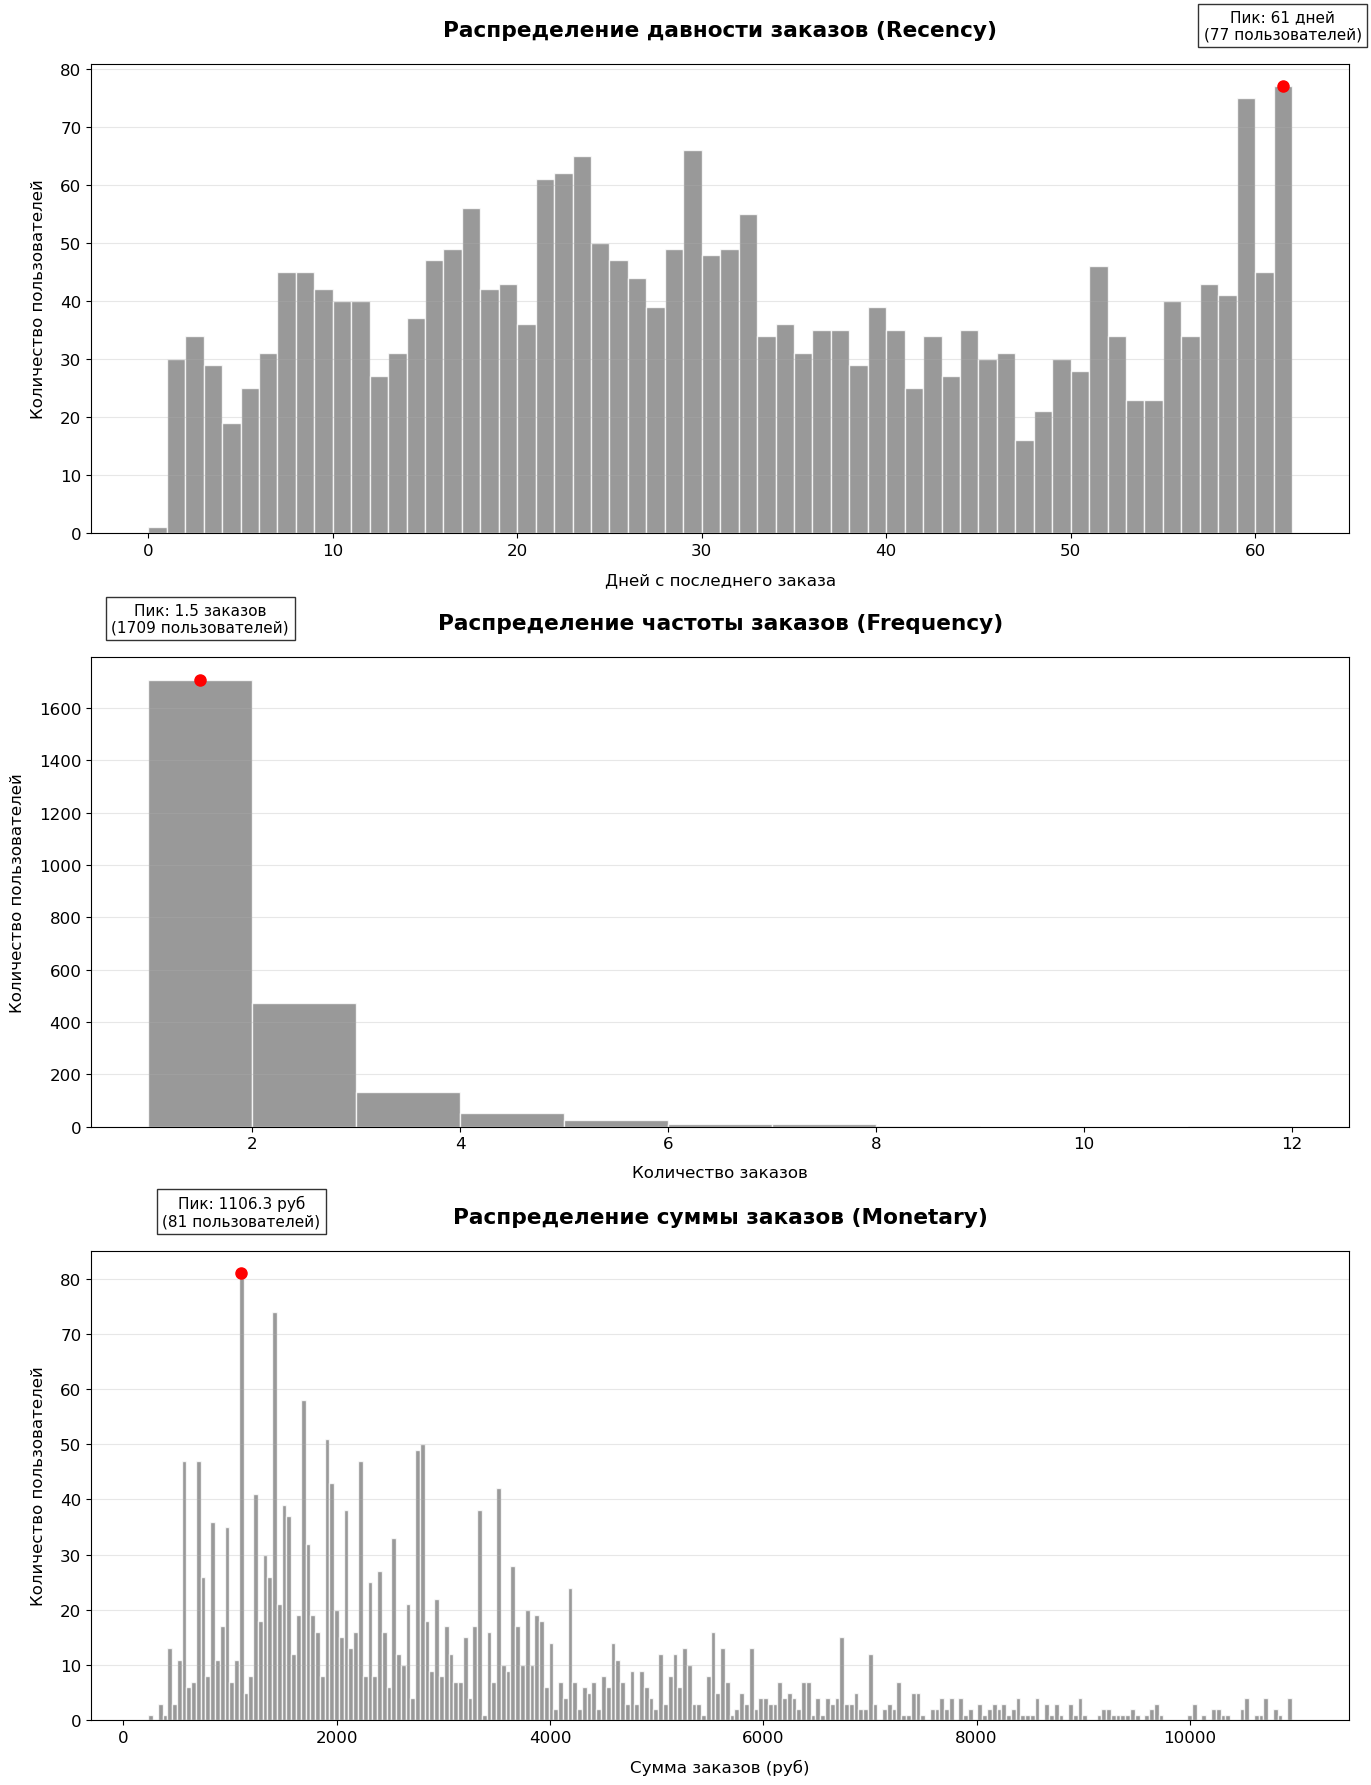

In [19]:
# Настройки стиля
plt.style.use('default')
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Создаем фигуру с 3 подграфиками
fig, axes = plt.subplots(3, 1, figsize=(14, 18))
plt.subplots_adjust(hspace=0.4)

# Цветовая схема
hist_color = 'grey'
alpha = 0.8

# 1. Гистограмма Recency
n_rec, bins_rec, _ = axes[0].hist(df_rfm['recency'], bins=62, color=hist_color, alpha=alpha, edgecolor='white')
max_rec_idx = np.argmax(n_rec)
max_rec_x = (bins_rec[max_rec_idx] + bins_rec[max_rec_idx+1])/2  # Центр бина
max_rec_y = n_rec[max_rec_idx]
axes[0].plot(max_rec_x, max_rec_y, 'ro', markersize=8)
axes[0].text(max_rec_x, max_rec_y+max_rec_y*0.1, 
            f'Пик: {int(max_rec_x)} дней\n({int(max_rec_y)} пользователей)',
            ha='center', va='bottom', fontsize=11, bbox=dict(facecolor='white', alpha=0.8))
axes[0].set_title('Распределение давности заказов (Recency)', pad=20)
axes[0].set_xlabel('Дней с последнего заказа', labelpad=10)
axes[0].set_ylabel('Количество пользователей', labelpad=10)
axes[0].grid(axis='y', alpha=0.3)

# 2. Гистограмма Frequency
n_freq, bins_freq, _ = axes[1].hist(df_rfm['frequency'], bins=11, color=hist_color, alpha=alpha, edgecolor='white')
max_freq_idx = np.argmax(n_freq)
max_freq_x = (bins_freq[max_freq_idx] + bins_freq[max_freq_idx+1])/2
max_freq_y = n_freq[max_freq_idx]
axes[1].plot(max_freq_x, max_freq_y, 'ro', markersize=8)
axes[1].text(max_freq_x, max_freq_y+max_freq_y*0.1, 
            f'Пик: {max_freq_x:.1f} заказов\n({int(max_freq_y)} пользователей)',
            ha='center', va='bottom', fontsize=11, bbox=dict(facecolor='white', alpha=0.8))
axes[1].set_title('Распределение частоты заказов (Frequency)', pad=20)
axes[1].set_xlabel('Количество заказов', labelpad=10)
axes[1].set_ylabel('Количество пользователей', labelpad=10)
axes[1].grid(axis='y', alpha=0.3)

# 3. Гистограмма Monetary
# Вычисляем 95-й процентиль для наглядной визуализации так как имеются правосторонние выбросы
monetary_95 = df_rfm['monetary_value'].quantile(0.95)

# Фильтруем данные
df_rfm_95 = df_rfm[df_rfm['monetary_value'] <= monetary_95]

n_mon, bins_mon, _ = axes[2].hist(df_rfm_95['monetary_value'], bins=240, color=hist_color, alpha=alpha, edgecolor='white')
max_mon_idx = np.argmax(n_mon)
max_mon_x = (bins_mon[max_mon_idx] + bins_mon[max_mon_idx+1])/2
max_mon_y = n_mon[max_mon_idx]
axes[2].plot(max_mon_x, max_mon_y, 'ro', markersize=8)
axes[2].text(max_mon_x, max_mon_y+max_mon_y*0.1, 
            f'Пик: {max_mon_x:.1f} руб\n({int(max_mon_y)} пользователей)',
            ha='center', va='bottom', fontsize=11, bbox=dict(facecolor='white', alpha=0.8))
axes[2].set_title('Распределение суммы заказов (Monetary)', pad=20)
axes[2].set_xlabel('Сумма заказов (руб)', labelpad=10)
axes[2].set_ylabel('Количество пользователей', labelpad=10)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# Выводим статистику
df_rfm.describe()

,user_id,recency,frequency,monetary_value
count,2416.000000,2416.000000,2416.000000,2416.000000
mean,535932.551738,31.086093,1.468957,3720.171429
std,143745.266073,17.444239,0.950901,4036.352731
min,5506.000000,0.000000,1.000000,235.200000
25%,558738.250000,17.000000,1.000000,1512.000000
50%,591033.500000,29.000000,1.000000,2590.000000
75%,615221.000000,46.000000,2.000000,4443.117000
max,679837.000000,62.000000,12.000000,81690.000000


- 🕰️ Значения метрики **Recency** распределены равномерно в диапазоне от 0 до 62 дней. Медиана близка к среднему. Равномерное распределение позволяет использовать разбиение на три равные группы.

- 🔄 Распределение частоты **Frequency** заказов в диапазоне от 1 до 12. Резко преобладают пользователи, совершившие всего один заказ. Число пользователей с увеличением числа заказов экспоненциально падает. Применим сегментацию: Редко - 1, иногда 2, часто 3 и более. Пороговая сегментация отражает реальное поведение.

- 💰  Метрика **Monetary** имеет нормально-подобное распределение, сконцентрирована в области небольших сумм с пиком 1423 руб., имеет длинный правосторонийй хвост с максимумом 81690 руб. Разделим на три группы по 33-му и 66-му перцентилям. Перцентильный подход (33/66) учитывает "длинный хвост" распределения, избегает перекоса в сегментах из-за выбросов, сохраняет интерпретируемость границ.

**Задача 3.2.** Выделим **RFM-сегменты** и изучим распределение пользователей по ним.
    
Применим следующие подходы к выделению RFM сегментов:
- **Recency** — разделим на три равные группы.
- **Frequency** —  разделим на три группы: 
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделим на три группы по 33-му и 66-му перцентилям.
    
После этого посчитаем количество покупателей в каждом сегменте, сделаем промежуточные выводы и напишем рекомендации.

In [21]:
# Определяем группу пользователя по количеству дней с момента последнего заказа: 
df_rfm['r'] = pd.cut(df_rfm['recency'], bins=3, labels=[3,2,1])

# Определяем группу пользователя по количеству заказов: 
df_rfm['f'] = pd.cut(df_rfm['frequency'], [1, 2, 3, 100], labels=[1,2,3], include_lowest=True)

# Определяем группу пользователя по сумме стоимости заказов: 
df_rfm['m'] = pd.qcut(df_rfm['monetary_value'], q=3, labels=[1,2,3])

# Находим групповой RFM-индекс:
df_rfm[['r','f','m']] = df_rfm[['r','f','m']].astype('str')
df_rfm['rfm_group'] = df_rfm['r'] + df_rfm['f'] + df_rfm['m']

In [22]:
# Группируем данные по сегментам и считаем их размер:
rfm_group = df_rfm.groupby('rfm_group').agg({'user_id':'nunique'}).reset_index()
# Считаем долю пользователей в каждом сегменте:
rfm_group['user_share(%)'] = rfm_group['user_id'] / rfm_group['user_id'].sum()*100
# Сортируем по числу пользователей
rfm_group = rfm_group.sort_values(by='user_id', ascending=False)
# Применяем цветовую градацию
rfm_group.style.background_gradient(
    subset=['user_share(%)'], 
    cmap='Greens')

,rfm_group,user_id,user_share(%)
8,212,296,12.251656
7,211,289,11.961921
0,111,263,10.885762
1,112,261,10.802980
15,311,255,10.554636
9,213,237,9.809603
16,312,234,9.685430
17,313,187,7.740066
2,113,160,6.622517
12,223,56,2.317881


### 📊 Интерпретация RFM-анализа

#### 🏷️ Структура клиентской базы (ТОП-5 сегментов)


| 🏆 Сегмент| 📊 Доля| 👥 Характеристика    | Давность/Заказов/Чек| 🎯 Рекомендации              |
|-----------|---------|----------------------|---------------------|--------------------------------|
| **212**   | 12.25%  | 🟢 Новички активные  | недавно/1/средний  | 💡 Upsell-стратегии            |
| **211**   | 11.96%  | 🟡 Новички экономные | недавно/1/низкий   | 🎁 Программы лояльности        |
| **111**   | 10.89%  | 🔵 Холодные          | давно/1/низкий     | ✉️ Реактивационные кампании    |
| **112**   | 10.80%  | 🟠 Уходящие          | давно/1/средний    | 🔄 Спецпредложения за возврат  |
| **311**   | 10.55%  | 🔥 Горячие новички   | новый/1/низкий     | ⏳ Фокус на удержание         |

#### 🔍 Критические инсайты
- **⚠️ 90.3%** пользователей совершили только **1 заказ** (Frequency=1)
- **⏱️ 30.3%** клиентов не покупали **давно** (Recency=1)

#### 🚀 Рекомендации по развитию

**Приоритет 1: Удержание массовых сегментов**  
🔹 Для 212/211:  
   - 🏆 Программа лояльности после 1-й покупки  
   - 🎯 Персональные рекомендации  

🔹 Для 111/112:  
   - ✉️ Реактивационные кампании  
   - 💰 Спецпредложения за возврат  

**Приоритет 2: Развитие лояльности**  
🔹 Для 311/312/313:  
   - 🔖 Подписка с эксклюзивными бонусами  
   - 🆕 Ранний доступ к новинкам  
   - 📈 Увеличение среднего чека  

**Приоритет 3: Работа с VIP**  
🔹 Для 233/323/333:  
   - 👔 Персональные менеджеры  
   - 🧪 Эксклюзивные продукты  


---

## K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделим рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволит выделить группы ресторанов с похожими характеристиками и разработать для них эффективные маркетинговые стратегии.

**Задача 4.1.** Подготовим данные для кластеризации и для каждого ресторана посчитаем:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [23]:
# Группируем и агрегируем данные для кластеризации. Фильтруем по событию оформления заказа чтобы учесть только действительные
rests = df[df['event']=='order'].groupby('rest_id').agg(
orders = ('order_id', 'nunique'),
aov = ('revenue', 'mean'),
menu_size = ('object_id', 'nunique')).reset_index()

**Задача 4.2.** Нормализуем данные и найдем оптимальное количество кластеров, использовав метод `.inertia_`. Построим график зависимости инерции от числа кластеров (метод «локтя») и предположим оптимальное количество кластеров.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

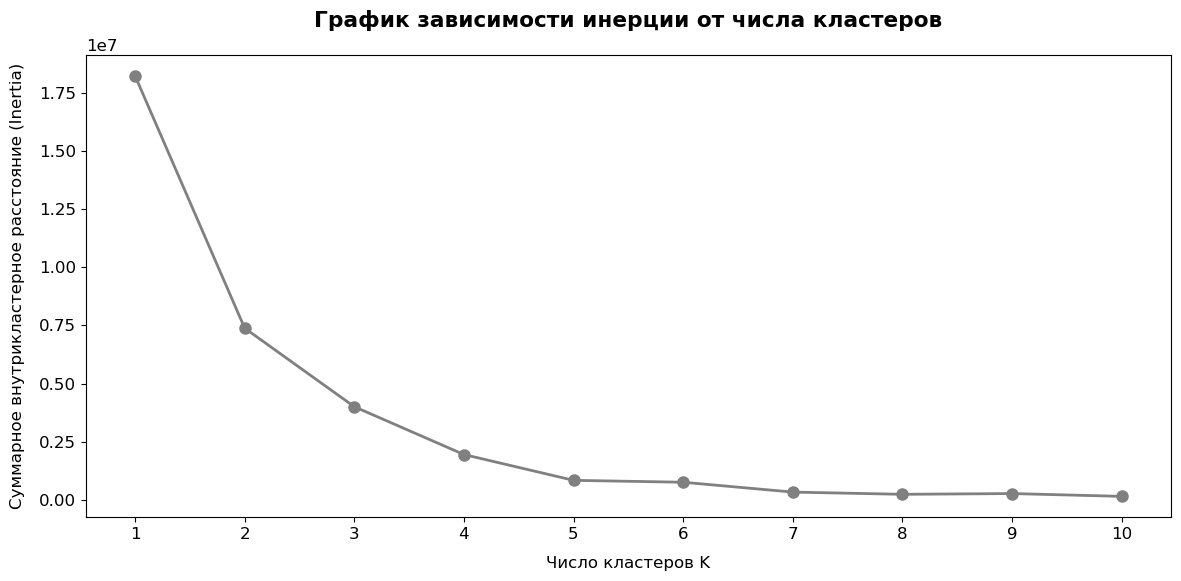

In [24]:
# Создаём массив, в котором будем хранить значения inertia для разбиения с разным числом кластеров
i = []

# Задаём диапазон количества кластеров
min_k = 1
max_k = 10

plt.figure(figsize=(12, 6))

# Перебираем разное количество кластеров
for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters=k) 
   km.fit_transform(rests.iloc[:, 1:])  
   i.append(km.inertia_)  

# Настройки стиля
plt.style.use('default')
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Построение графика
plt.plot(range(min_k, max_k + 1), i, 
         marker='o', 
         color='grey',
         linewidth=2,
         markersize=8)
# Оформление
plt.title('График зависимости инерции от числа кластеров', pad=20)
plt.xlabel('Число кластеров K', labelpad=10)
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)', labelpad=10)
plt.xticks(range(min_k, max_k + 1))
plt.tight_layout()
plt.show()


- По графику видно, что оптимальное число кластеров 4

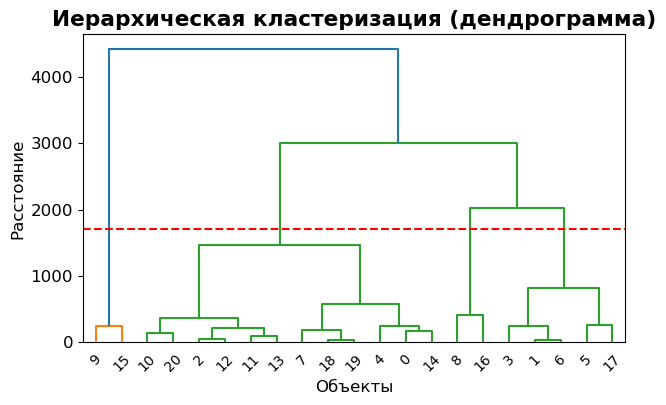

In [25]:
# Код ревьюера:
# Создадим таблицу связей:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(rests.iloc[:, 1:], method = 'ward')

# Визуализируем таблицу связей:
plt.figure(figsize=(7, 4))  
dendrogram(linked, orientation='top')

plt.axhline(y=1700, color='r', linestyle='--')  
plt.title("Иерархическая кластеризация (дендрограмма)")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")

plt.show()

**Задача 4.3.** Проведем кластеризацию, проанализируем полученные результаты и рассчитаем средние значения по каждому кластеру.
    
После этого визуализируем результаты, чтобы проследить зависимость признаков друг от друга. Построим две визуализации, на которые нанесем все кластеры:
- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

После этого опишем каждый кластер в промежуточном выводе. 

In [26]:
# Задаем число кластеров и обучаем модель
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(rests.iloc[:, 1:])

# Сортируем кластеры по возрастанию «Числа заказов» (индекс 0)
sorted_indices = np.argsort(kmeans.cluster_centers_[:, 0])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

# Создаём DataFrame из центроидов
centroids_df = pd.DataFrame(
   sorted_centroids,
   columns=['Число заказов', 'Средний Чек', 'Размер меню'],
   index=[f'Кластер {i + 1}' for i in range(kmeans.n_clusters)]
)

# Форматируем числа для вывода (3 знака после точки)
pd.options.display.float_format = '{:.3f}'.format

# Выводим таблицу
print(centroids_df.head())

           Число заказов  Средний Чек  Размер меню
Кластер 1         66.333     1982.649        8.333
Кластер 2         77.000     3120.901       10.000
Кластер 3         84.000     4657.770        2.500
Кластер 4       1100.000     2498.829       83.000


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
# Извлекаем координаты центроидов
centroids = kmeans.cluster_centers_

# Цветовая схема 
cluster_colors = ['#2A5CAA', '#FF6B35', '#00A896', '#7D5BA6'] 
centroid_color = '#E83F6F' 
bg_color = '#F5F7FA' 

# Настройка стиля
plt.style.use('seaborn-white')
fig, axes = plt.subplots(1, 2, figsize=(20, 10), facecolor=bg_color)
features = ["Число заказов", "Средний чек", "Размер меню"]

# Создаем графики для пар признаков
for i, (x_idx, y_idx) in enumerate([(0, 1), (0, 2)]):
    axes[i].set_facecolor(bg_color)
    
    # Точки данных 
    scatter = axes[i].scatter(
        rests.iloc[:, x_idx+1],
        rests.iloc[:, y_idx+1],
        c=labels,
        cmap=ListedColormap(cluster_colors),
        s=180,
        alpha=0.85,
        edgecolor='white',
        linewidth=0.8
    )
    
    # Центроиды
    axes[i].scatter(
        centroids[:, x_idx],
        centroids[:, y_idx],
        s=500,
        c=centroid_color,
        marker='*',  
        edgecolor='black',
        linewidth=1.2,
        label='Центроиды',
        zorder=3 
    )
    
    # Настройки оформления
    axes[i].set_xlabel(features[x_idx], fontsize=18, color='#333333', fontweight='medium')
    axes[i].set_ylabel(features[y_idx], fontsize=18, color='#333333', fontweight='medium')
    axes[i].set_title(f'Зависимость: {features[x_idx]} и {features[y_idx]}', 
                     fontsize=18, pad=15, color='#2A2A2A', fontweight='bold')
    
    # Сетка
    axes[i].grid(True, color='#E0E0E0', linestyle='--', alpha=0.7)
    
    # Легенда 
    if i == 0:
        legend = axes[i].legend(
            handles=scatter.legend_elements()[0],
            labels=[f'Группа {i+1}' for i in range(4)],
            title="Кластеры:",
            bbox_to_anchor=(1.02, 1),
            loc='upper left',
            frameon=True,
            framealpha=0.95,
            edgecolor='#CCCCCC'
        )
        legend.get_title().set_fontsize(18)
        for text in legend.get_texts():
            text.set_fontsize(16)

# Общая информация
plt.suptitle('Кластерный анализ ресторанов: ключевые взаимосвязи', 
            fontsize=22, y=1.05, color='#2A2A2A', fontweight='bold')

# Подпись с инерцией
plt.figtext(0.5, 0.01, f'Мера кластеризации (Inertia): {kmeans.inertia_:.2f}', 
           ha='center', fontsize=18, style='italic', color='#555555')

plt.tight_layout()
plt.show()

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

### **Анализ кластеров ресторанов**  

На основе кластеризации K-Means выделено **4 кластера**, которые различаются по ключевым метрикам:  

| 📊 Параметр          | 🔵 Кластер 1      | 🟠 Кластер 2     | 🟢 Кластер 3          | 🟣 Кластер 4           |
|-----------------------|--------------------|-----------------|--------------------|---------------------|
| **📦 Число заказов** | 65.3               | 71.7             | 84.0               | **1100.0**          |
| **💰 Средний чек**   | 3024.8             | 1931.6           | **4657.8**         | 2498.8              |
| **📋 Размер меню**   | 9.2                | 8.6              | 2.5                | **83.0**           |

---

### **📌 Описание кластеров**  

#### **🔵 Кластер 1: "Рестораны с высоким чеком и умеренным спросом"**  
- **📈 Средняя активность:** 65 заказов/месяц  
- **💎 Высокий средний чек:** 3025 ₽  
- **🍴 Компактное меню:** 9 позиций  
- **💡 Рекомендации:**  
  - 🔄 Увеличить видимость премиальных блюд  
  - 🎯 Программы лояльности для повышения частоты заказов  

#### **🟠 Кластер 2: "Бюджетно-ориентированные заведения"**  
- **📊 Умеренная активность:** 72 заказа/месяц  
- **💲 Самый низкий чек:** 1932 ₽  
- **🥗 Минималистичное меню:** 9 позиций  
- **💡 Рекомендации:**  
  - 👨‍🍳 Улучшить подачу блюд (фото/описания)  
  - 🚚 Оптимизировать стоимость доставки  

#### **🟢 Кластер 3: "Эксклюзивные премиум-рестораны"**  
- **💎 Максимальный чек:** 4658 ₽  
- **🍜 Ультра-минимализм:** 2-3 позиции в меню  
- **📉 Низкая активность:** 84 заказа/месяц  
- **💡 Рекомендации:**  
  - 🎨 Усилить эксклюзивность через storytelling  
  - 🤝 Внедрить подписки на дегустационные сеты  

#### **🟣 Кластер 4: "Сетевые операторы"**  
- **📊 Массовый спрос:** 1100 заказов/месяц  
- **🍽️ Сбалансированное меню:** 83 позиции  
- **💲 Средний чек:** 2499 ₽  
- **💡 Рекомендации:**  
  - ⏱️ Автоматизация логистики  
  - 🏆 Кэшбэк для постоянных клиентов  

---

### **🔍 Промежуточный вывод**  
1. **🔵 Премиум-доступность:** Высокий чек при умеренном спросе → потенциал роста частоты  
2. **🟠 Бюджетный сегмент:** Требует улучшения ценности предложения  
3. **🟢 Эксклюзивность:** Минимальное меню + максимальный чек → фокус на удержании  
4. **🟣 Сети:** Оптимизация операционных процессов  

**🚀 Следующие шаги:**  
- 🌍 Анализ географии для кластеров 1 и 2  
- 🔄 A/B-тесты форматов подписок для кластера 3  


## 🚀 Общий вывод: ключевые инсайты и рекомендации  


### 🔍 **Главные проблемы продукта:**  
1. **📱 Мобильная конверсия**  
   - Падение конверсии на **35%** при подтверждении телефона  
   - Потеря **16.7%** пользователей на `верификация → страница блюда`  

2. **🔄 Низкая лояльность клиентов**  
   - **90.3%** пользователей совершают только 1 заказ  
   - **30.3%** клиентов неактивны >40 дней  

3. **⚖️ Дисбаланс работы с ресторанами**  
   - Рестораны с высоким чеком (🔵) не используют потенциал роста частоты  
   - Сетевые операторы (🟣) не оптимизируют логистику  

---

### 💡 **Приоритетные решения:**  

**👥 Для пользователей:**  
- **СРОЧНЫЙ редизайн мобильной верификации**  
  - Верификация: ссылка вместо SMS-кода/соцсети/биометрия  
  - Сохранение контекста после регистрации  
- **Программа лояльности для 1-заказчиков**  
  - Бонус за 2-й заказ в течение 7 дней  
  - Персонализированные рекомендации  

**🤝 Для ресторанов:**  
- **Персонализированные стратегии:**  
  - 🔵 Высокий чек: программы лояльности + продвижение премиальных блюд  
  - 🟣 Сетевым: автоматизация логистики + кэшбэк для постоянных клиентов  
- **Пилот для премиум-сегмента (🟢):**  
  - Внедрение подписок на эксклюзивные дегустационные сеты  

---

### 📈 **Ожидаемый эффект:**  
| Направление              | Ключевая метрика                     | Прогноз роста |  
|--------------------------|--------------------------------------|---------------|  
| Мобильная конверсия      | Заказы после верификации             | +25-30%       |  
| Лояльность               | Повторные заказы                     | +15-20%       |  
| Партнерская эффективность| Частота заказов в кластере 1 (🔵)    | +18%          |  

---

### 🔚 **Заключение:**  

🚀 **Фокус на 3 ключевых направления даст максимальный ROI:**  
1. **📱 Исправление мобильного UX** (особенно верификации)  
2. **🏆 Система лояльности** для "одноразовых" клиентов  
3. **🤝 Дифференцированный подход к ресторанам** по кластерам  

---

**Следующие шаги:**  
1. **🧪 A/B-тест нового потока подтверждения телефона** (2 недели)  
2. **🛠️ Разработка MVP программы лояльности**  
3. **🤝 Переговоры с ресторанами каждого кластера** об индивидуальных условиях  

> 💡 **Главный инсайт:** Улучшение мобильного опыта и персонализация взаимодействия с разными сегментами пользователей/ресторанов принесут 80% результата.  
> **Особый акцент:** Для кластера 1 (🔵) ключевой KPI — рост частоты заказов при сохранении премиальности.

---